In [75]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
buy = pd.read_csv('./raw_data/buy.csv', index_col=0)

/Users/yunsoowoo/miniforge3/envs/prj_final/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
buy

,date,sex,age,big_cat,sm_cat,qty
1,20180101,F,20,식품,가공란,37
2,20180101,F,30,식품,가공란,16
3,20180101,F,40,식품,가공란,9
4,20180101,F,50,식품,가공란,3
5,20180101,M,20,식품,가공란,13
...,...,...,...,...,...,...
528636,20191231,M,20,냉난방가전,히터,8
528637,20191231,M,30,냉난방가전,히터,22
528638,20191231,M,40,냉난방가전,히터,38
528639,20191231,M,50,냉난방가전,히터,23


In [18]:
all_buy = buy.groupby(by=['date', 'sm_cat'], as_index=False)['qty'].sum()

In [11]:
products = all_buy['sm_cat'].unique().tolist()

In [20]:
all_buy['date'] = pd.to_datetime(all_buy['date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
all_buy.set_index('date', inplace=True)

In [63]:
mypart = foods[105:]

## 가공란

In [26]:
test = all_buy[all_buy['sm_cat']=='가공란']

In [32]:
test.drop('sm_cat', axis = 1, inplace=True)

/Users/yunsoowoo/miniforge3/envs/prj_final/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


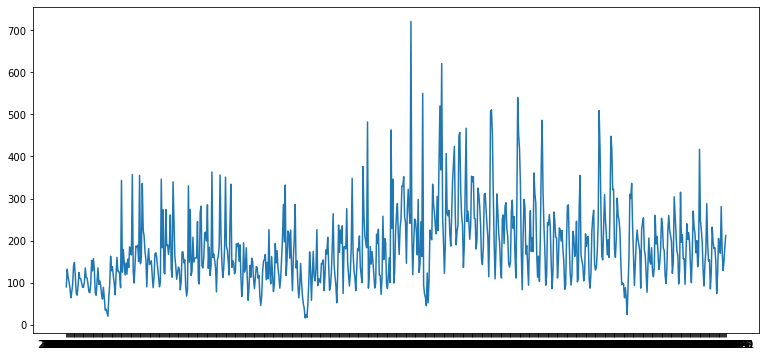

In [34]:
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 13, 6  # matlab 차트의 기본 크기를 13, 6으로 지정
plt.plot(test)

In [36]:
# 결측치 확인
print(test[test.isna()].sum())

# 결측치가 있다면 보간해주기
# ts1=ts1.interpolate(method='time')

qty    0.0
dtype: float64


In [40]:
from statsmodels.tsa.stattools import  adfuller

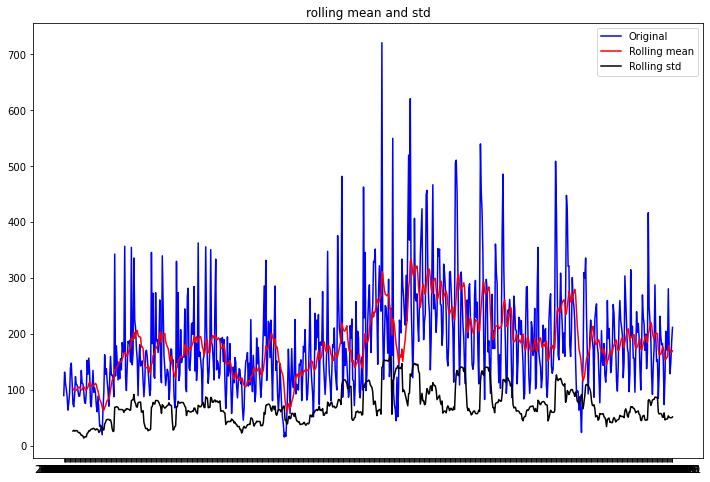

Results of Dickey-Fuller Test
p-value = 0.0372. The series is likely stationary.
Test Statistic                  -2.975776
p-value                          0.037219
#Lags Used                      20.000000
Number of Observations used    709.000000
Critical Value(1%)              -3.439607
Critical Value(5%)              -2.865625
Critical Value(10%)             -2.568945
dtype: float64


In [42]:
def test_stationarity(timeseries, window=12, cutoff=0.05):
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling mean')
    std = plt.plot(rolstd, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean and std')
    plt.show()
    
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value',  '#Lags Used', 'Number of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-vale = %.4f. The series is likely non-stationary.' % pvalue)
    print(dfoutput)

test_stationarity(test)

In [76]:
for food in mypart:
    print(food)
    temp = all_buy[all_buy['sm_cat']==food]
    temp.drop('sm_cat', axis = 1, inplace=True)

    print('Results of Dickey-Fuller Test')
    dftest = adfuller(temp, autolag='AIC', maxlag = 20)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value',  '#Lags Used', 'Number of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < 0.05:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-vale = %.4f. The series is likely non-stationary.' % pvalue)
    print(dfoutput, '\n'*2)

선식
Results of Dickey-Fuller Test
p-value = 0.0048. The series is likely stationary.
Test Statistic                  -3.652370
p-value                          0.004835
#Lags Used                      19.000000
Number of Observations used    710.000000
Critical Value(1%)              -3.439594
Critical Value(5%)              -2.865619
Critical Value(10%)             -2.568942
dtype: float64 


소고기 등심/안심
Results of Dickey-Fuller Test
p-value = 0.0000. The series is likely stationary.
Test Statistic                -8.241556e+00
p-value                        5.698965e-13
#Lags Used                     8.000000e+00
Number of Observations used    7.210000e+02
Critical Value(1%)            -3.439452e+00
Critical Value(5%)            -2.865557e+00
Critical Value(10%)           -2.568909e+00
dtype: float64 


소고기 육회
Results of Dickey-Fuller Test
p-vale = 0.8049. The series is likely non-stationary.
Test Statistic                  -0.847060
p-value                          0.804906
#Lags Used  

p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.832403e+00
p-value                        1.879131e-09
#Lags Used                     7.000000e+00
Number of Observations used    6.750000e+02
Critical Value(1%)            -3.440075e+00
Critical Value(5%)            -2.865831e+00
Critical Value(10%)           -2.569055e+00
dtype: float64 


옥수수
Results of Dickey-Fuller Test
p-value = 0.0227. The series is likely stationary.
Test Statistic                  -3.154925
p-value                          0.022747
#Lags Used                      18.000000
Number of Observations used    711.000000
Critical Value(1%)              -3.439581
Critical Value(5%)              -2.865614
Critical Value(10%)             -2.568939
dtype: float64 


옥수수차
Results of Dickey-Fuller Test
p-value = 0.0079. The series is likely stationary.
Test Statistic                  -3.501943
p-value                          0.007937
#Lags Used                      20.000000
Number of Obse

p-value = 0.0000. The series is likely stationary.
Test Statistic                -5.985749e+00
p-value                        1.793963e-07
#Lags Used                     1.500000e+01
Number of Observations used    7.140000e+02
Critical Value(1%)            -3.439542e+00
Critical Value(5%)            -2.865596e+00
Critical Value(10%)           -2.568930e+00
dtype: float64 


참외/메론/수박
Results of Dickey-Fuller Test
p-vale = 0.2470. The series is likely non-stationary.
Test Statistic                  -2.093849
p-value                          0.246995
#Lags Used                      18.000000
Number of Observations used    711.000000
Critical Value(1%)              -3.439581
Critical Value(5%)              -2.865614
Critical Value(10%)             -2.568939
dtype: float64 


초유 영양제
Results of Dickey-Fuller Test
p-vale = 0.0641. The series is likely non-stationary.
Test Statistic                  -2.760927
p-value                          0.064075
#Lags Used                      20.000000
N

Results of Dickey-Fuller Test
p-vale = 0.0927. The series is likely non-stationary.
Test Statistic                  -2.601368
p-value                          0.092715
#Lags Used                      20.000000
Number of Observations used    709.000000
Critical Value(1%)              -3.439607
Critical Value(5%)              -2.865625
Critical Value(10%)             -2.568945
dtype: float64 


프로바이오틱스
Results of Dickey-Fuller Test
p-vale = 0.1515. The series is likely non-stationary.
Test Statistic                  -2.366328
p-value                          0.151466
#Lags Used                      14.000000
Number of Observations used    715.000000
Critical Value(1%)              -3.439529
Critical Value(5%)              -2.865591
Critical Value(10%)             -2.568927
dtype: float64 


프로폴리스/로얄젤리
Results of Dickey-Fuller Test
p-vale = 0.1235. The series is likely non-stationary.
Test Statistic                  -2.467988
p-value                          0.123459
#Lags Used           

In [79]:
non = []
stat =[]

for food in mypart:
    temp = all_buy[all_buy['sm_cat']==food]
    temp.drop('sm_cat', axis = 1, inplace=True)

    dftest = adfuller(temp, autolag='AIC', maxlag = 20)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value',  '#Lags Used', 'Number of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < 0.05:
        stat.append(food)
    else:
        non.append(food)

In [80]:
non

['소고기 육회',
 '숙취/에너지/건강 음료',
 '시금치',
 '쌈채소',
 '아이스티',
 '야채/호박즙',
 '양배추/양상추',
 '어란(생선알)',
 '어린이 음료',
 '어린이영양제',
 '어린잎/새싹채소',
 '오리고기/훈제오리',
 '오메가3/스쿠알렌 영양제',
 '오이/가지',
 '요거트/발효유',
 '원두커피',
 '유자차',
 '율무차',
 '음용 식초',
 '잡곡 씨드류',
 '장어',
 '저/무지방우유',
 '전통차',
 '조개',
 '주꾸미',
 '참외/메론/수박',
 '초유 영양제',
 '초코우유',
 '칼슘/철분 영양제',
 '캡슐/POD커피',
 '코코아/핫초코',
 '콜라겐/코큐텐 영양제',
 '콩나물/숙주',
 '탄산수',
 '탄산음료',
 '토마토',
 '파/양파',
 '파김치',
 '포도/거봉/체리',
 '프라페/버블티 파우더',
 '프로바이오틱스',
 '프로폴리스/로얄젤리',
 '한방재료',
 '해초류 ',
 '허브차',
 '호박',
 '홍차',
 '환자식']